# Machine Learning for Regression

## 1. Data Preparation for a `car sales` data

In [448]:
import pandas as pd
import numpy as np

### Get data

In [449]:
car = pd.read_csv('https://raw.githubusercontent.com/bankymondial/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv')

In [450]:
car.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#### Making column names consistent by changing the including `_` and changing `upper` to `lower` case.


In [451]:
car.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [452]:
car.columns = car.columns.str.lower().str.replace(' ', '_')

In [453]:
car.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#### Using `dtypes` to find string columns (object types), and then standardizing the values

In [454]:
car.dtypes[car.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [455]:
car.dtypes[car.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [456]:
strings = list(car.dtypes[car.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

#### Loop over strings to perform the same action that was done on the column titles

In [457]:
for col in strings:
    car[col] = car[col].str.lower().str.replace(' ', '_')

In [458]:
car.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [459]:
car.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

### Exploratory Data Analysis

#### Finding unique values for each column

In [460]:
for col in car.columns:
    print(col)
    print(car[col].unique()[:5])
    print(car[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

#### Distribution of Price

In [461]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

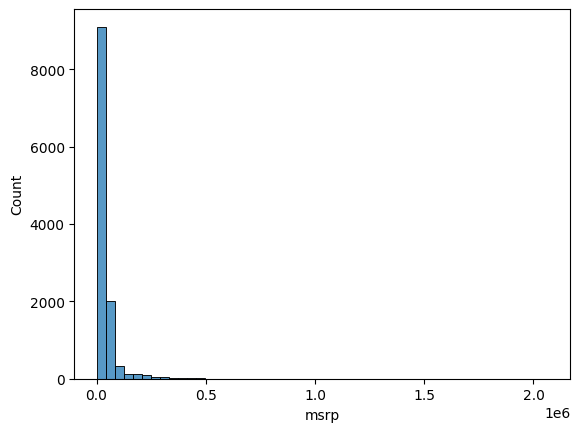

In [462]:
sns.histplot(car.msrp, bins=50)

##### Zooming in on the denser part of the distribution

<Axes: xlabel='msrp', ylabel='Count'>

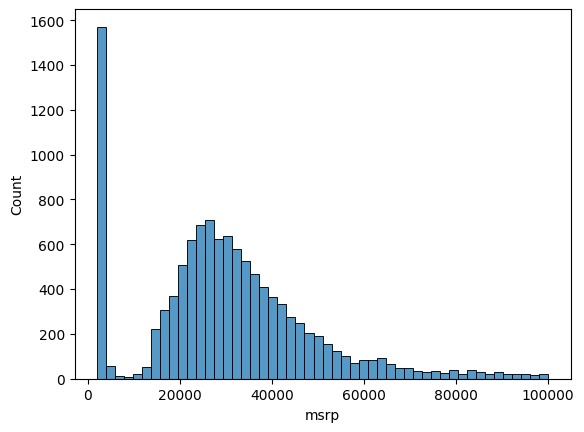

In [463]:
sns.histplot(car.msrp[car.msrp < 100000], bins=50)

##### Getting rid of the long-tail in the distribution

In [464]:
np.log1p([0, 1, 10, 1000, 1000000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 13.81551156])

In [465]:
price_logs = np.log1p(car.msrp)

In [466]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

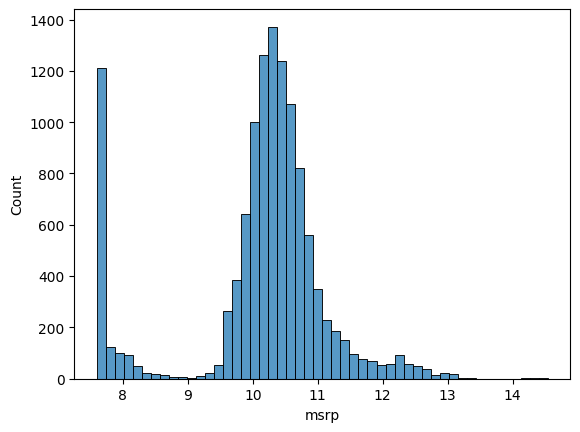

In [467]:
sns.histplot(price_logs, bins=50)

#### Examining Missing values

In [468]:
car.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2. Setting up the validation framework

### The first step is to divide the dataset into `training`, `validation` and `test` subsets

In [469]:
n = len(car)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [470]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [471]:
car_train = car.iloc[n_train:]
car_val = car.iloc[n_train:n_train+n_val]
car_test = car.iloc[n_train+n_val:]

In [472]:
car_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7150,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,63645
7151,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,22,16,61,63195
7152,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,76650
7153,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,69135
7154,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,22,17,1385,37380
9528,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,extended_cab_pickup,23,16,1385,40100
9529,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42560
9530,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42860


#### There is a need to shuffle the dataset to ensure that each subset is representative of the whole in composition, such that no one "make" or "model" dominates a subset.

In [473]:
idx = np.arange(n)

##### A seed is set to ensure that result of the shuffle generates the same result every time it's run.

In [474]:
np.random.seed(3)
np.random.shuffle(idx)

In [475]:
car_train = car.iloc[idx[:n_train]]
car_val = car.iloc[idx[n_train:n_train+n_val]]
car_test = car.iloc[idx[n_train+n_val:]]

In [476]:
car_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
8929,volvo,s70,2000,regular_unleaded,190.0,5.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,870,2500
8806,gmc,s-15,1990,regular_unleaded,105.0,4.0,manual,rear_wheel_drive,2.0,NaN,compact,extended_cab_pickup,25,21,549,2000
7233,oldsmobile,ninety-eight,1995,regular_unleaded,225.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,sedan,26,17,26,2000
3535,aston_martin,dbs,2010,premium_unleaded_(required),510.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,high-performance",midsize,convertible,18,12,259,283900
8763,chevrolet,s-10,2002,regular_unleaded,190.0,6.0,automatic,rear_wheel_drive,2.0,performance,compact,regular_cab_pickup,20,15,1385,21499


In [477]:
len(car_train), len(car_val), len(car_test)

(7150, 2382, 2382)

##### Resetting indices

In [478]:
car_train = car_train.reset_index(drop=True)
car_val = car_val.reset_index(drop=True)
car_test = car_test.reset_index(drop=True)

In [479]:
car_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,volvo,s70,2000,regular_unleaded,190.0,5.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,870,2500
1,gmc,s-15,1990,regular_unleaded,105.0,4.0,manual,rear_wheel_drive,2.0,NaN,compact,extended_cab_pickup,25,21,549,2000
2,oldsmobile,ninety-eight,1995,regular_unleaded,225.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,sedan,26,17,26,2000
3,aston_martin,dbs,2010,premium_unleaded_(required),510.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,high-performance",midsize,convertible,18,12,259,283900
4,chevrolet,s-10,2002,regular_unleaded,190.0,6.0,automatic,rear_wheel_drive,2.0,performance,compact,regular_cab_pickup,20,15,1385,21499


##### Turning the `target` variable into an array (without indices)

In [480]:
y_train = np.log1p(car_train.msrp.values)
y_val = np.log1p(car_val.msrp.values)
y_test = np.log1p(car_test.msrp.values)

In [481]:
y_train

array([ 7.82444593,  7.60140233,  7.60140233, ...,  7.60140233,
        9.95683873, 10.30129004])

##### Deleting `msrp` to prevent it from being accidentally used for training purposes

In [482]:
del car_train['msrp']
del car_val['msrp']
del car_test['msrp']

In [483]:
len(y_train)

7150

## 3. Linear Regression

##### Implementing on a single data point

In [484]:
car_train.iloc[10]

make                            toyota
model                           sienna
year                              2016
engine_fuel_type      regular_unleaded
engine_hp                        266.0
engine_cylinders                   6.0
transmission_type            automatic
driven_wheels          all_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                     large
vehicle_style        passenger_minivan
highway_mpg                         23
city_mpg                            16
popularity                        2031
Name: 10, dtype: object

In [485]:
xi = [266, 16, 2031]

In [486]:
w0 = 8.18
w = [0.01, 0.04, 0.002]

In [487]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]
    
    return pred

In [488]:
linear_regression(xi)

15.542000000000002

In [489]:
np.expm1(15.542000000000002)

np.float64(5620885.783046965)

#### Linear regression vector form

##### Generalizing the equation

In [490]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res

In [491]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [492]:
w_new = [w0] + w

In [493]:
w_new

[8.18, 0.01, 0.04, 0.002]

In [494]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [495]:
linear_regression(xi)

15.542000000000002

In [496]:
w0 = 8.18
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [497]:
x1 = [1, 150, 26, 1400]
x2 = [1, 130, 23, 1600]
x10 = [1, 266, 16, 2031]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  150,   26, 1400],
       [   1,  130,   23, 1600],
       [   1,  266,   16, 2031]])

In [498]:
def linear_regression(X):
        return X.dot(w_new)

In [499]:
linear_regression(X)

array([13.52 , 13.6  , 15.542])

### 4. Training a linear regression model

In [500]:
def train_linear_regression(X, y):
    pass

In [512]:
X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86]
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [502]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [503]:
X = (np.column_stack([ones, X]))

In [504]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [505]:
XTX = X.T.dot(X)

In [506]:
XTX_inv = np.linalg.inv(XTX)

In [507]:
w_full = XTX_inv.dot(X.T).dot(y)

In [508]:
w0 = w_full[0]
w = w_full[1:]

In [509]:
w0, w

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

##### Note: To run the function below, one has to jump from running the array `X` to here, as the `ones` have to be avoided. Otherwise, the function will fail.

In [510]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [513]:
train_linear_regression(X, y)

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

#### Car price baseline model

In [514]:
car_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [515]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [516]:
X_train = car_train[base].values

In [517]:
y_train

array([ 7.82444593,  7.60140233,  7.60140233, ...,  7.60140233,
        9.95683873, 10.30129004])

##### Dealing with missing values

In [518]:
car_train[base].isnull().sum()

engine_hp           37
engine_cylinders    17
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [519]:
car_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [520]:
X_train = car_train[base].fillna(0).values

In [521]:
w0, w = train_linear_regression(X_train, y_train)

In [523]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

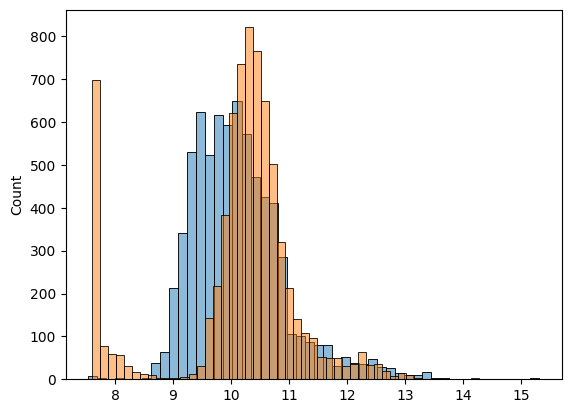

In [525]:
sns.histplot(y_pred, alpha=0.5, bins = 50)
sns.histplot(y_train, alpha=0.5, bins = 50)

##### Note: The predicted model is in blue

#### Root Mean Square Error (RMSE) - a method of evaluating the regression model

In [526]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [527]:
rmse(y_train, y_pred)

np.float64(0.7530702635167188)

### 4. Validating the model

##### Recap: Below is the code for training the model

In [531]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = car_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [533]:
def prepare_X(car):
    car_num = car[base]
    car_num = car_num.fillna(0)
    X = car_num.values
    return X # expanding the second line of code - training data preparation

#### Now, applying the model to the validatation subset

In [534]:
X_train = prepare_X(car_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(car_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.7460612947996883)

#### Simple feature engineering

###### adding more features to the model

In [535]:
2017 - car_train.year

0       17
1       27
2       22
3        7
4       15
        ..
7145     0
7146     9
7147    27
7148     1
7149     9
Name: year, Length: 7150, dtype: int64

In [552]:
def prepare_X(car):
    car = car.copy() # to prevent the original dataframe from changing when adding a new feature
    
    car['age'] = 2017 - car.year
    features = base + ['age']
    
    car_num = car[features]
    car_num = car_num.fillna(0)
    X = car_num.values
    return X

In [553]:
X_train = prepare_X(car_train)

In [554]:
X_train

array([[1.900e+02, 5.000e+00, 2.400e+01, 1.700e+01, 8.700e+02, 1.700e+01],
       [1.050e+02, 4.000e+00, 2.500e+01, 2.100e+01, 5.490e+02, 2.700e+01],
       [2.250e+02, 6.000e+00, 2.600e+01, 1.700e+01, 2.600e+01, 2.200e+01],
       ...,
       [1.140e+02, 4.000e+00, 2.600e+01, 1.900e+01, 8.700e+02, 2.700e+01],
       [1.600e+02, 4.000e+00, 3.900e+01, 2.700e+01, 1.851e+03, 1.000e+00],
       [2.600e+02, 6.000e+00, 2.400e+01, 1.600e+01, 5.657e+03, 9.000e+00]])

In [555]:
X_train = prepare_X(car_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(car_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.512385164444267)

##### Note: Given the initial rmse of 0.75, there is an improvement in the model by adding a new feature. The rmse reduced to 0.51. This can be seen in a better alignment of the distribution between the predicted model and the validation model).

In [ ]:
sns.histplot(y_pred, alpha=0.5, bins = 50, color = 'blue')
sns.histplot(y_val, alpha=0.5, bins = 50, color = 'green')